In [1]:
#Install and load library
# update.packages(ask = FALSE)
# install.packages("NLP", dependencies=TRUE)
# install.packages("slam", dependencies=TRUE)
# install.packages("tm", dependencies=TRUE) # for text mining
# install.package("SnowballC", dependencies=TRUE) # for text stemming
# install.packages("wordcloud", dependencies=TRUE)# word-cloud generator
# install.packages("RColorBrewer", dependencies=TRUE) # color palettes
# install.packages('lda', dependencies=TRUE)
# install.packages('modeltools', dependencies=TRUE)
# install.packages('stats4', dependencies=TRUE)
# # install.packages('methods', dependencies=TRUE)
# install.packages('toppicmodels', dependencies=TRUE)
# install.packages('ggplot2', dependencies = TRUE)
# install.packages("NbClust", dependencies = TRUE)
# install.packages("factoextra", dependencies = TRUE)

# install.packages("lda", dependencies = TRUE)
# install.packages("MASS", dependencies = TRUE)
# install.packages("topicmodels", dependencies = TRUE)
# install.packages("lsa", dependencies = TRUE)
# install.packages("text2vec", dependencies = TRUE)

In [2]:
setwd("/home/harish/PycharmProjects/Topic-Modeling/")

In [3]:
library(NLP)
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(ggplot2)
library(factoextra)
# library(cluster)
library(NbClust)
library(lsa)
# library(fpc)

#LDA

library(lda)
library(MASS)
library(topicmodels)

Loading required package: RColorBrewer

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [4]:
## BUILDING CORPUS

folder <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/FullDataset/yearbasis/"
summary(folder)
corpus_name <- Corpus(DirSource(folder, recursive=TRUE),readerControl = list(reader=readPlain));

   Length     Class      Mode 
        1 character character 

In [5]:
num_docs <- length(corpus_name)

In [6]:
#---------------Data preprocessing:
print("dimension before:");
print(DocumentTermMatrix(corpus_name));

corpus_name<-tm_map(corpus_name,PlainTextDocument);
corpus_name<-tm_map(corpus_name, content_transformer(tolower));
corpus_name<-tm_map(corpus_name,removeWords,stopwords("english"));
corpus_name<-tm_map(corpus_name,removePunctuation);
corpus_name<-tm_map(corpus_name,removeNumbers);
corpus_name<-tm_map(corpus_name,stripWhitespace);

words_to_remove_in_article<-c("system","reserve","tthe","rnthe","participants", "continue", "open","committee", "federal", "also", "meeting", "FOMC", "\r","\t","Present", "\n", 'year') #irrevalant words
corpus_name<-tm_map(corpus_name, removeWords,words_to_remove_in_article); #removing irrevalant words in the article

corpus_name<-tm_map(corpus_name, stemDocument, language="english");

print("dimension after:");
print(DocumentTermMatrix(corpus_name));

[1] "dimension before:"
<<DocumentTermMatrix (documents: 25, terms: 10807)>>
Non-/sparse entries: 66603/203572
Sparsity           : 75%
Maximal term length: 26
Weighting          : term frequency (tf)
[1] "dimension after:"
<<DocumentTermMatrix (documents: 25, terms: 12529)>>
Non-/sparse entries: 50979/262246
Sparsity           : 84%
Maximal term length: 142
Weighting          : term frequency (tf)


In [7]:
#todo: change the bounds, weighttfidf, 

In [8]:
#----------------------Text Analysis------

##build tdm/dtm matrix
tdm <- TermDocumentMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
tdm_matrix <- as.matrix(tdm)
##build a document/term matrix... words must have length 4
dtm <- DocumentTermMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
dtm_matrix <- as.matrix(dtm)
print(dim(dtm_matrix))
dtm

[1]   25 4752


<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 41750/77050
Sparsity           : 65%
Maximal term length: 56
Weighting          : term frequency (tf)

In [9]:
dtms <- removeSparseTerms(dtm, 0.93)
dtms

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 41750/77050
Sparsity           : 65%
Maximal term length: 56
Weighting          : term frequency (tf)

In [10]:
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
# print(head(d, 30))
print(findFreqTerms(dtm,lowfreq = 2000))

 [1] "activ"    "balanc"   "bank"     "busi"     "chang"    "committe"
 [7] "condit"   "consum"   "continu"  "declin"   "econom"   "economi" 
[13] "expect"   "financi"  "forecast" "fund"     "growth"   "howev"   
[19] "increas"  "indic"    "inflat"   "labor"    "level"    "like"    
[25] "market"   "measur"   "moder"    "monetari" "month"    "note"    
[31] "number"   "outlook"  "pace"     "percent"  "period"   "polici"  
[37] "price"    "product"  "project"  "quarter"  "rang"     "rate"    
[43] "real"     "remain"   "rise"     "risk"     "spend"    "time"    
[49] "unemploy"


### Freq Visualization:

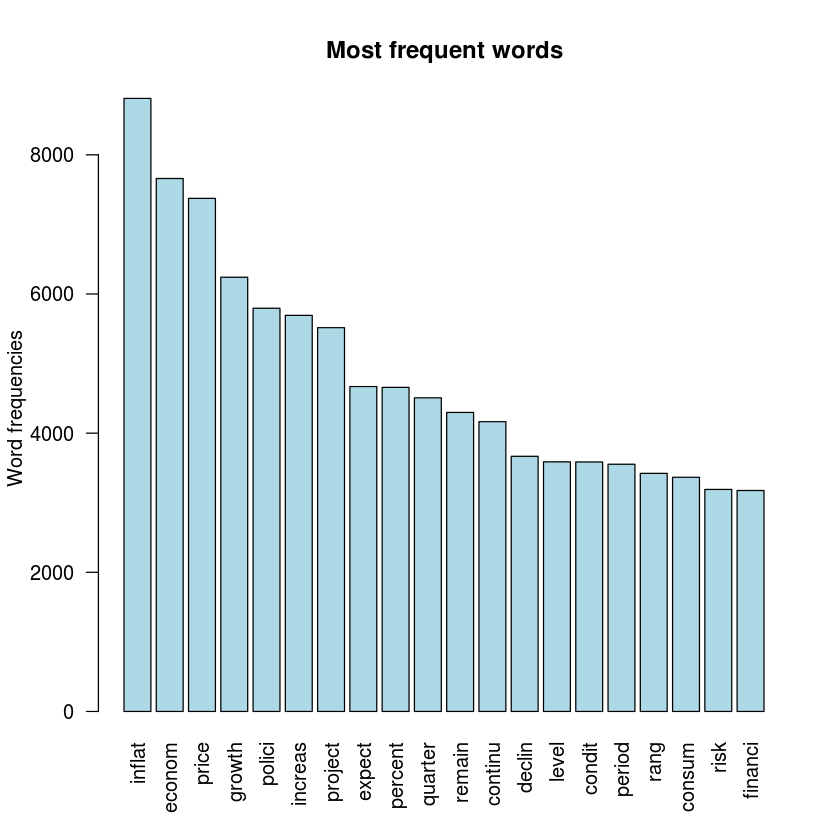

In [11]:
  #bar plot:
#   saveFileAs<- paste("wordFreq_barplot", i, sep="_")
#   setwd('/home/harish/PycharmProjects/Topic-Modeling/pictures')
#   png(filename = saveFileAs)
  barplot(d[1:20,]$freq, las = 2, names.arg = d[1:20,]$word,
          col ="lightblue", main ="Most frequent words",
          ylab = "Word frequencies")
#   dev.off()



In [12]:
#   saveFileAs<- paste("wordcloud", i, sep="_")
#   png(filename = saveFileAs)
#   wordcloud(names(v), v, max.words=100, rot.per=0.15, random.order=F,colors=brewer.pal(8, "Dark2"))
#   dev.off()

In [13]:
head(d,30)

,word,freq
inflat,inflat,8811
econom,econom,7660
price,price,7374
growth,growth,6241
polici,polici,5795
increas,increas,5693
project,project,5516
expect,expect,4670
percent,percent,4658
quarter,quarter,4508


### Word Importance : TF-IDF

In [14]:
dtm_tfidf <- weightTfIdf(dtms) 
dtm_tfidf

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 29025/89775
Sparsity           : 76%
Maximal term length: 56
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

### Clustering:

In [15]:
matDTM<-as.matrix(dtms)
tfidf<-weightTfIdf(dtms)
tfidf# how does the sparsity increases compared to dtms?
sparse<-removeSparseTerms(tfidf,0.995)
s<-as.matrix(sparse); dim(s)

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 29025/89775
Sparsity           : 76%
Maximal term length: 56
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

[1]   25 4243

##### Optimal clustmer number

In [16]:
#clustering
set.seed(123)
res<-NbClust(data=s, min.nc = 2, max.nc = 20, distance="euclidean", method="kmeans", index="silhouette")
f<-fviz_nbclust(s,kmeans,method="silhouette")
res$Best.nc
#saving
# png('optimalCluster2.png')
# f
# dev.off()
# res


Number_clusters     Value_Index 
        20.0000          0.6483

## NOTE: There are two optimum which are closer, check out  cluster number = 6

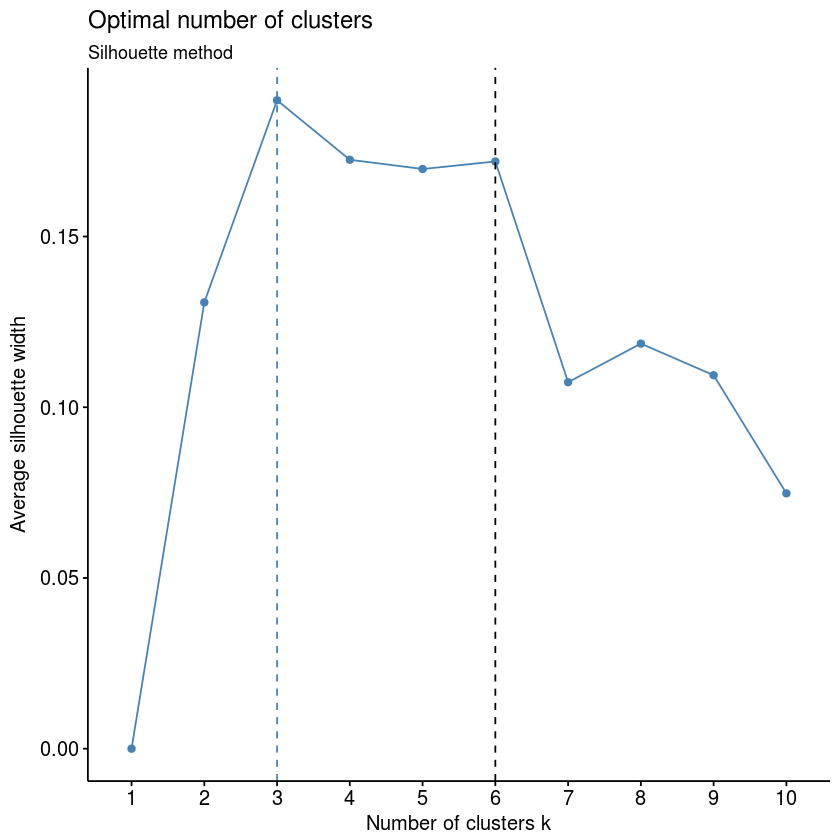

In [17]:
f+geom_vline(xintercept = 6, linetype = 2)+labs(subtitle = "Silhouette method")

In [18]:
png("elbow cluster.png")
fviz_nbclust(s, kmeans, method = "wss") +
geom_vline(xintercept = 6, linetype = 2)+
labs(subtitle = "Elbow method")
dev.off()

png 
  2

In [19]:
png("Silhouette.png")
fviz_nbclust(s, kmeans, method = "silhouette")+labs(subtitle = "Silhouette method")
# plot(prcomp(dtms)$x,col=cl_3$cluster)
dev.off()

png 
  2

# Kmeans

prcomp: 

Performs a principal components analysis on the given data matrix and returns the results as an object of class prcomp.

The calculation is done by a singular value decomposition of the (centered and possibly scaled) data matrix, not by using eigen on the covariance matrix. This is generally the preferred method for numerical accuracy.

In [20]:
#--------------------------------kmeans------------------------
set.seed(123)
# clus<-kmeans(s,3)

#wordcloud
m <- as.matrix(tfidf)
rownames(m) <- 1:nrow(m)

norm_eucl<- function(m)m/apply(m,MARGIN=1, FUN=function(x)sum(x^2)^.5)#Normalization first
m_norm<-norm_eucl(m)

cl_3<-kmeans(m_norm,3)
table(cl_3$cluster)
png("kmeansCluster_3.png")
plot(prcomp(m_norm)$x, col=cl_3$cl)
dev.off()


 1  2  3 
 6 10  9 

png 
  2

In [21]:
cl_3$tot.withinss

[1] 13.72281

### Three clusters: *however we have topics more than 4?* Lets check with 6

In [22]:
#cluster numbers = 6
m_norm<-norm_eucl(m)
cl_6<-kmeans(m_norm,6)
table(cl_6$cluster)
png("kmeansCluster_6.png")
plot(prcomp(m_norm)$x, col=cl_6$cl)
dev.off()


1 2 3 4 5 6 
3 4 6 5 3 4 

png 
  2

### Which one to choose?

There are 3 SSE- based measures that we consider: total withinSSE, betweenSSE and total SSE.
The actual values of those measure are difficult to interpret. We will be looking at the ratio
withinSSE/totalSSE. Total withinSSE shows how coherent (tight) are the clusters. The betweenSSE
shows how well the clusters are separated. The total SSE is the sum. A good clustering has tight
clusters that are well separated. So, we would like ratio withinSSE/totalSSE to be small. As we
experiment with different representations, we should compare that ratio to see what representation
gives better clustering

In [23]:
SSE_3<-100-(cl_3$tot.withinss/cl_3$totss)*100
SSE_3
SSE_6<-100-(cl_6$tot.withinss/cl_6$totss)*100
SSE_6

[1] 30.74793

[1] 46.3386

## LDA:

In [24]:
# svs = sort.list(abs(svd(dtms)$v[,4]), decreasing = TRUE)
# dtms$dimnames$Terms[head(svs, 6)]

In [25]:

##return top words by concept

##first create function to return top words; require dtms
concept<-function(num){ 
  sv<-sort.list((svd(dtms))$v[,num],decreasing = FALSE)
  # print(sv)
  # print(dtms$dimnames)
  dm<-dtms$dimnames$Terms[head(sv,5)] 
  return(dm)
}

In [26]:
##how many words?
num <- num_docs
i <- 1:num
val <- sapply(i, concept)

In [27]:
val

inflat,growth,committe,inflat,pace,chang,increas,purchas,purchas,market,⋯,rate,market,polici,action,inventori,increas,expans,remain,substanti,busi
econom,price,labor,price,labor,project,growth,financi,labor,demand,⋯,term,domest,increas,lower,price,firm,slow,sale,relat,sector
price,quarter,polici,energi,purchas,uncertainti,pace,asset,product,labor,⋯,commerci,import,continu,indic,continu,activ,gain,inflat,risk,anticip
project,expans,rang,core,inflat,pace,price,hous,pace,rise,⋯,interest,improv,larg,fund,activ,action,treasuri,hurrican,overal,domest
polici,busi,percent,expect,price,accommod,moder,risk,rise,price,⋯,accommod,chang,inventori,domest,chang,percent,consist,time,effect,rnrn


In [28]:
# library(ggplot2)
# ii <- 2000:2011
# ss <- rnorm(12,0,1)
# pm <- data.frame(ii,ss)
# tmpplot <- ggplot(pm, aes(x = ii, y = ss))
# plot <- tmpplot + geom_line() + scale_x_continuous(breaks=seq(2000,2011, 0.5))
# plot 

In [29]:
#Set parameters for Gibbs sampling
burnin = 4000
iter = 2000
thin = 500
seed = list(2003,5,63,100001,765)
nstart = 5
best = TRUE

#Number of topics
k = 3

In [30]:
# write.table(val,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)
# ldaGibbs5@gamma

In [31]:
# ##how many words?
# num <- 5
# i <- 1:num
# sapply(i, concept)
# # https://stackoverflow.com/questions/14875493/lda-with-topicmodels-how-can-i-see-which-topics-different-documents-belong-to


In [32]:
# k=5
# ldaGibbs5 <-LDA(dtms, k, method = "Gibbs") 
# #docs to topics 
# ldaGibbs5.topics <- as.matrix(topics(ldaGibbs5))
# #get probability of each topic in each doc
# topicProbabilities <- as.data.frame(ldaGibbs5@gamma)

In [33]:
# topicProbabilities
# nrow(ldaGibbs5@gamma)

In [34]:
# vector <- NULL
# for(i in 1:nrow(ldaGibbs5@gamma)) {
#   vector <- c(vector, ldaGibbs5@gamma[i,])
# }


# Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4","Concept 5"),times=102)#why 80?
# TimeByDocs <- as.numeric(rep(1:102,each=5))
# chartdata <- data.frame(Concepts,TimeByDocs,vector)
# myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()


In [35]:
# ggsave(filename="myPlot.png", plot=myplot)

In [36]:
# l<-c()
# i <- 0
# for (j in 1993:2005){
#    l[i] <- j
#     i <- i + 1
# }

In [52]:
##how many words?
# for (k in 2:5){
k = 6
#     num <- num_docs
#     i <- 1:num
#     val <- sapply(i, concept)
    # https://stackoverflow.com/questions/14875493/lda-with-topicmodels-how-can-i-see-which-topics-different-documents-belong-to
    

    ldaGibbs_k <-LDA(dtms, k, method = "Gibbs")
    #docs to topics 
#     ldaGibbs_k.topics <- as.matrix(topics(ldaGibbs_k))
#     #get probability of each topic in each doc
#     topicProbabilities <- as.data.frame(ldaGibbs_k@gamma)
# write.table(val,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)

    vector <- NULL
    for(i in 1:nrow(ldaGibbs_k@gamma)) {
      vector <- c(vector, ldaGibbs_k@gamma[i,])
    }


    Concepts <- rep(c("Concept 1","Concept 2","Concept 3","Concept 4","Concept 5","Concept 6"),times=num_docs)
#     TimeByDocs <- as.numeric(rep(c("1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004",
#                                    "2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"),each=k))
    
TimeByDocs <- as.numeric(rep(1993:2017,each=k))
chartdata <- data.frame(Concepts,TimeByDocs,vector)
    myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
    plotname <- paste(k,"png", sep=".");
    ggsave(filename=plotname, plot=myplot)
    
# }

Saving 6.67 x 6.67 in image


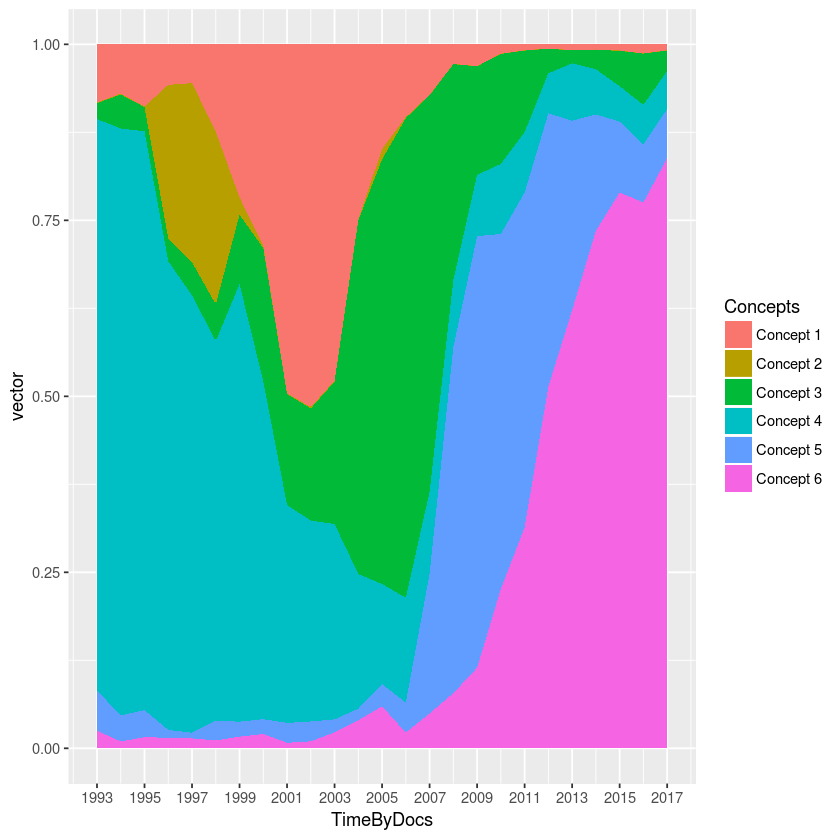

In [56]:
ii <- 1993:2017

TimeByDocs <- as.numeric(rep(1993:2017,each=k))
plot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area() + scale_x_continuous(breaks=seq(1993,2017, 2))
plot 

In [39]:
# Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4","Concept 5"),times=102)#why 80?
#     TimeByDocs <- as.numeric(rep(c("1993","1994","1995","1996","1997","1998","1999",
#                                    "2000","2001","2002","2003","2004","2005"),each=k))
#     chartdata <- data.frame(Concepts,TimeByDocs,vector)
#     myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
# myplot

In [40]:

write.table(topicProbabilities,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)

Warning message in write.table(topicProbabilities, file = paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), :
“appending column names to file”

In [41]:
ldaGibbs_k@gamma[1:10,]


0.22673827,0.06373943,0.7095223
0.20590906,0.03664560,0.7574453
0.18881961,0.05283386,0.7583465
0.09451159,0.01798891,0.8874995
0.08819873,0.01495792,0.8968433
0.15717893,0.01913781,0.8236833
0.27256954,0.03004550,0.6973850
0.42527278,0.03192817,0.5427990
0.55193347,0.02492959,0.4231369
0.57353547,0.03114495,0.3953196


In [42]:
ldaGibbs_k@beta

-7.533622,-14.47191,-7.737315,-7.725494,-9.856786,-14.471907,-9.073744,-6.812264,-9.856786,-8.382862,⋯,-14.471907,-14.47191,-14.47191,-14.47191,-14.47191,-14.471907,-14.47191,-14.47191,-14.471907,-14.471907
-14.823546,-11.77902,-9.185191,-7.426597,-10.891720,-7.289318,-14.823546,-14.823546,-14.823546,-10.114016,⋯,-9.471688,-10.89172,-11.77902,-11.38956,-11.77902,-9.471688,-10.71267,-11.38956,-9.471688,-9.471688
-10.705657,-14.13964,-11.095122,-7.846225,-14.139644,-7.347300,-9.343854,-6.852768,-6.331321,-14.139644,⋯,-14.139644,-14.13964,-14.13964,-14.13964,-14.13964,-14.139644,-14.13964,-14.13964,-14.139644,-14.139644


In [43]:
# dtms$dimnames$Terms

In [44]:
lda.terms <- as.matrix(terms(ldaGibbs_k, 10))
lda.terms

Topic 1,Topic 2,Topic 3
price,inflat,growth
inflat,project,price
econom,econom,increas
growth,percent,polici
increas,polici,econom
quarter,expect,period
remain,price,quarter
spend,rang,expans
consum,fund,rang
continu,increas,month


In [45]:
length(terms(ldaGibbs_k, 2000)[,1])# First column how many terms in topic; 1858 not 2000

[1] 2000

# LSA

In [46]:
#LSA
reduce <-function(A,dim) {
#Calculates the SVD
single_val_d <-svd(A) #Approximate each result of SVD with the given dimension
u<-as.matrix(single_val_d$u[, 1:dim])
v<-as.matrix(single_val_d$v[, 1:dim])
d<-as.matrix(diag(single_val_d$d)[1:dim, 1:dim])

#Create the new approximated matrix
return(as.matrix(u%*%d%*%t(v),type='blue'))
}
#50
reduce_50 <-reduce(dtms,50)

ERROR: Error in single_val_d$u[, 1:dim]: subscript out of bounds


In [ ]:
sing <-svd(dtms)
diag(sing$d)[1:6,]

In [ ]:
sv = sort.list(abs(sing$v[,6]), decreasing = TRUE)
dtms$dimnames$Terms[head(sv, 5)]

In [ ]:
ldaGibbs_k

## Visualization

In [ ]:
library(stringr)
library(text2vec)


In [ ]:
#LSA:
lsa = LSA$new(n_topics = 6)

In [ ]:
lsa$fit_transform(dtm)

In [ ]:
lsa$transform(dtm)


In [ ]:
lsa$components

#### Creating Latent space:
https://www.rdocumentation.org/packages/lsa/versions/0.73.1/topics/lsa

In [ ]:
# create some files
td = tempfile()
dir.create(td)
write( c("dog", "cat", "mouse"), file=paste(td, "D1", sep="/") )
write( c("ham", "mouse", "sushi"), file=paste(td, "D2", sep="/") )
write( c("dog", "pet", "pet"), file=paste(td, "D3", sep="/") )

# LSA
data(stopwords_en)
myMatrix = textmatrix(td, stopwords=stopwords_en)
myMatrix = lw_logtf(myMatrix) * gw_idf(myMatrix)
myLSAspace = lsa(myMatrix, dims=dimcalc_share())
as.textmatrix(myLSAspace)


In [ ]:
### Vector mapping:
words_to_remove_in_article<-c("system","reserve","tthe","rnthe","participants", "continue", "open","committee", "federal", "also", "meeting", "FOMC", "\r","\t","Present", "\n", 'year') #irrevalant words

#buildt dtm
lsatextmatrix <- textmatrix(mydir = folder, stemming = TRUE, language = "english", minWordLength = 4,
                            minDocFreq = 2, stopwords = words_to_remove_in_article, removeNumbers = TRUE)

# folder_i <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/speeches/brainard.pdf"

# #build other dtm
# lsatextmatrix2003 <- textmatrix(mydir = folder_i, vocabulary = rownames(lsatextmatrix))

# #perform lsa
# lsa2002 <- lsa(lsatextmatrix)


# ##fold in
# lsa2003folded <- fold_in(lsatextmatrix2003 ,lsa2002)

In [ ]:
lsatextmatrix

# Lexicon based progress over year

In [ ]:
lsa